# Test

In [1]:
import os
sampling_rate = 1600  #Hz
train_size = 0.8
time_period = 10
test_size = 0.1
valid_size = 0.1
random_state = 42
EPOCHS = 10


# Configuration constants
interpolation_interval = 0.120  # s
block_interval = 7  # s
padding_time = 1.56  # s


test_directory = os.path.join(os.getcwd(), 'test')


test_file = "/home/arisenthil/Downloads/kickstart/crushcore_0.75/DMM-1 Run 2 2024-04-14T22.45.41.csv"

In [2]:
print(test_directory)

/home/arisenthil/capstone2025_python/test


In [3]:
# Ensure the correct variable is used for the file path
with open(test_file, 'r') as file:
    for i, line in enumerate(file):
        if i >= 5:
            break
        print(line.strip())

"Index","DMM-1 Time (s)","DMM-1 Current (A)"
"1","2.491957","-1.3E-10"
"2","2.608909","-8E-11"
"3","2.725186","-2.5E-10"
"4","2.841243","-6E-11"


In [4]:
import tools

2025-09-10 15:31:46.841795: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
test_subdirc = tools.process_test(test_file, test_directory)

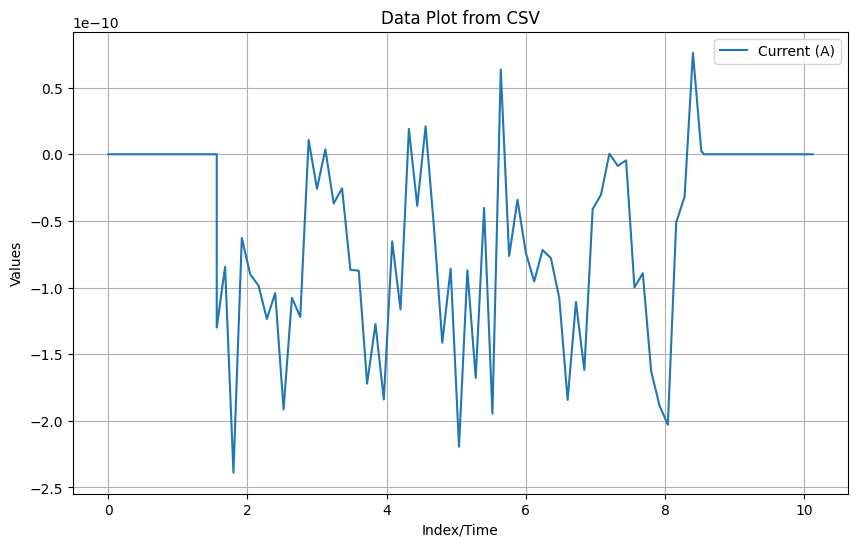

In [ ]:
# import pandas as pd

# import matplotlib.pyplot as plt

# # Path to the CSV file
# csv_file_path = '/home/arisenthil/capstone2025_python/test/test_2025-09-10_15-11-28/test_0.csv'

# # Read the CSV file
# data = pd.read_csv(csv_file_path)

# # Plot the data
# plt.figure(figsize=(10, 6))
# for column in data.columns[1:]:  # Assuming the first column is an index or time
#     plt.plot(data.iloc[:, 0], data[column], label=column)

# plt.xlabel('Index/Time')
# plt.ylabel('Values')
# plt.title('Data Plot from CSV')
# plt.legend()
# plt.grid()
# plt.show()

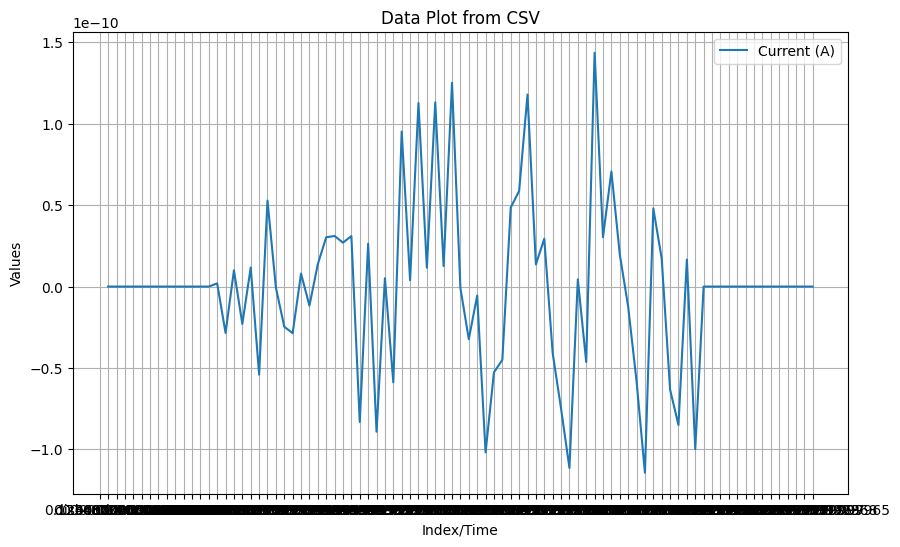

In [ ]:
# import pandas as pd

# import matplotlib.pyplot as plt

# # Path to the CSV file
# csv_file_path = '/home/arisenthil/capstone2025_python/data/disbond_0.75_sep7/disbond 0.75/disbond 0.75_22.csv'

# # Read the CSV file
# data_df = pd.read_csv(csv_file_path)

# # Plot the data
# plt.figure(figsize=(10, 6))
# for column in data_df.columns[1:]:  # Assuming the first column is an index or time
#     plt.plot(data_df.iloc[:, 0], data_df[column], label=column)

# plt.xlabel('Index/Time')
# plt.ylabel('Values')
# plt.title('Data Plot from CSV')
# plt.legend()
# plt.grid()
# plt.show()

In [6]:
data_for_testing = tools.read_test_csv_files(test_subdirc, sampling_rate, period=time_period)

In [7]:
data_for_testing

[[(np.float64(0.0), np.float64(0.0)),
  (np.float64(0.000625), np.float64(0.0)),
  (np.float64(0.00125), np.float64(0.0)),
  (np.float64(0.001875), np.float64(0.0)),
  (np.float64(0.0025), np.float64(0.0)),
  (np.float64(0.003125), np.float64(0.0)),
  (np.float64(0.00375), np.float64(0.0)),
  (np.float64(0.004375), np.float64(0.0)),
  (np.float64(0.005), np.float64(0.0)),
  (np.float64(0.005625), np.float64(0.0)),
  (np.float64(0.00625), np.float64(0.0)),
  (np.float64(0.006875), np.float64(0.0)),
  (np.float64(0.0075), np.float64(0.0)),
  (np.float64(0.008125), np.float64(0.0)),
  (np.float64(0.00875), np.float64(0.0)),
  (np.float64(0.009375), np.float64(0.0)),
  (np.float64(0.01), np.float64(0.0)),
  (np.float64(0.010625), np.float64(0.0)),
  (np.float64(0.01125), np.float64(0.0)),
  (np.float64(0.011875), np.float64(0.0)),
  (np.float64(0.0125), np.float64(0.0)),
  (np.float64(0.013125), np.float64(0.0)),
  (np.float64(0.01375), np.float64(0.0)),
  (np.float64(0.014375), np.float64

In [8]:
test_wave_files = tools.test_wav_generator(data_for_testing, sampling_rate)

I0000 00:00:1757536310.403645   11734 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2787 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [9]:
test_wav_files_directory = os.path.join(os.getcwd(), 'test_wav_files', 'testwave')
print(test_wav_files_directory)

/home/arisenthil/capstone2025_python/test_wav_files/testwave


In [10]:
test_wav_files_subdirectory = tools.save_test_wav_files(test_wave_files, test_wav_files_directory)

In [12]:
import tensorflow as tf

In [19]:
model = tf.saved_model.load("/home/arisenthil/capstone2025_python/saved_models/audio_classifier_model")

In [20]:
model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x762ba42c70a0>

In [23]:
result = model(tf.constant(str(r"/home/arisenthil/capstone2025_python/test_wav_files/testwave_v1/audio_2.wav")))

In [24]:
class_name = result['class_names'].numpy()[0].decode('utf-8')
print(f"Classified as: {class_name}")  # Output: "crushcore 0.75"

Classified as: crushcore 0.75


In [26]:
test_wav_files_subdirectory

'/home/arisenthil/capstone2025_python/test_wav_files/testwave_v1'

In [27]:
files_in_subdirectory = os.listdir(test_wav_files_subdirectory)
print(files_in_subdirectory)

['audio_1.wav', 'audio_6.wav', 'audio_7.wav', 'audio_5.wav', 'audio_4.wav', 'audio_3.wav', 'audio_9.wav', 'audio_8.wav', 'audio_2.wav']


In [30]:
import os
import tensorflow as tf

def classify_audio_files(model, test_directory):
    """
    Classify all audio files in a directory using the provided model.
    
    Args:
        model: Loaded TensorFlow model
        test_directory: Path to directory containing audio files
        
    Returns:
        List of classification results
    """
    # Get all .wav files in the directory
    files_in_directory = [f for f in os.listdir(test_directory) if f.endswith('.wav')]
    
    # Sort files to ensure consistent ordering (audio_1, audio_2, etc.)
    files_in_directory.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    
    results = []
    
    for file_name in files_in_directory:
        # Create full file path
        file_path = os.path.join(test_directory, file_name)
        
        try:
            # Run prediction
            result = model(tf.constant(str(file_path)))
            
            # Extract classification
            class_name = result['class_names'].numpy()[0].decode('utf-8')
            class_id = result['class_ids'].numpy()[0]
            confidence_scores = result['predictions'].numpy()[0]
            
            # Store result
            classification_result = {
                'file_name': file_name,
                'file_path': file_path,
                'predicted_class': class_name,
                'class_id': class_id,
                'confidence_scores': confidence_scores.tolist()  # Convert to list for easier handling
            }
            
            results.append(classification_result)
            
            # Print result as requested
            file_number = file_name.split('_')[1].split('.')[0]  # Extract number from "audio_X.wav"
            print(f"testfile {file_number} classified as {class_name}")
            
        except Exception as e:
            print(f"Error classifying {file_name}: {e}")
            results.append({
                'file_name': file_name,
                'file_path': file_path,
                'predicted_class': 'ERROR',
                'class_id': -1,
                'confidence_scores': [],
                'error': str(e)
            })
    
    return results



In [37]:
# Usage examples:

# Detailed results with all information
results = classify_audio_files(model, test_wav_files_subdirectory)

# Access specific results
for index, result in enumerate(results, start=1):
    print(f"Test file {index} - {result['predicted_class']}")

testfile 1 classified as crushcore 0.75
testfile 2 classified as crushcore 0.75
testfile 3 classified as crushcore 0.75
testfile 4 classified as crushcore 0.75
testfile 5 classified as crushcore 0.75
testfile 6 classified as crushcore 0.75
testfile 7 classified as crushcore 0.75
testfile 8 classified as crushcore 0.75
testfile 9 classified as crushcore 0.75
Test file 1 - crushcore 0.75
Test file 2 - crushcore 0.75
Test file 3 - crushcore 0.75
Test file 4 - crushcore 0.75
Test file 5 - crushcore 0.75
Test file 6 - crushcore 0.75
Test file 7 - crushcore 0.75
Test file 8 - crushcore 0.75
Test file 9 - crushcore 0.75


In [ ]:
import os
import tkinter as tk
from tkinter import ttk, filedialog, messagebox, scrolledtext
import threading
import numpy as np
import tensorflow as tf
from keras import layers, models
import pandas as pd
from scipy.interpolate import interp1d
import time
from datetime import datetime
import logging
from pathlib import Path

sampling_rate = 1600  #Hz
train_size = 0.8
time_period = 10
test_size = 0.1
valid_size = 0.1
random_state = 42
EPOCHS = 10


# Configuration constants
interpolation_interval = 0.120  # s
block_interval = 7  # s
padding_time = 1.56  # s


def process_csv_file(file_path):
    """Process a single CSV file"""
    # Read CSV file
    df = pd.read_csv(file_path, header=None, encoding='utf-8', skiprows=1, usecols=range(1, 3))
    df.columns = ['DMM-1 Time (s)', 'DMM-1 Current (A)']
    
    # Normalize time to start from 0
    df['DMM-1 Time (s)'] = df['DMM-1 Time (s)'] - df['DMM-1 Time (s)'].min()
    
    # Interpolate the function
    interpolation_func = interp1d(df['DMM-1 Time (s)'], df['DMM-1 Current (A)'], 
                                 kind='linear', fill_value='extrapolate')
    max_time = df['DMM-1 Time (s)'].max()
    min_time = df['DMM-1 Time (s)'].min()
    new_time = np.arange(min_time, max_time, interpolation_interval)
    new_current = interpolation_func(new_time)
    
    interpolated_df = pd.DataFrame({'Time (s)': new_time, 'Current (A)': new_current})
    
    # Create time blocks with padding
    num_blocks = int(np.floor(max_time / block_interval))
    time_intervals = [(i * block_interval, (i + 1) * block_interval) for i in range(num_blocks)]
    dfs_block_with_padding = []
    
    for start_time, end_time in time_intervals:
        # Get block data
        block_df = interpolated_df[
            (interpolated_df['Time (s)'] >= start_time) & 
            (interpolated_df['Time (s)'] <= end_time)
        ]
        
        # Add padding
        padding_before_time = pd.Series(np.arange(start_time - padding_time, start_time, interpolation_interval))
        padding_after_time = pd.Series(np.arange(end_time, end_time + padding_time, interpolation_interval))
        
        padding_before = pd.DataFrame({
            'Time (s)': padding_before_time, 
            'Current (A)': [0] * len(padding_before_time)
        })
        padding_after = pd.DataFrame({
            'Time (s)': padding_after_time, 
            'Current (A)': [0] * len(padding_after_time)
        })
        
        # Combine block with padding
        block_with_padding = pd.concat([padding_before, block_df, padding_after], ignore_index=True)
        
        # Normalize time for this block
        if len(padding_before_time) > 0:
            block_with_padding['Time (s)'] = block_with_padding['Time (s)'] - padding_before_time.min()
        
        dfs_block_with_padding.append(block_with_padding)
    
    return dfs_block_with_padding



def write_csv_test(processed_df, test_directory):
    current_time_str = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    # Combine the label with the current time
    subdir_label = f"test_{current_time_str}"

    # Create the subdirectory path with the new label
    subdir = os.path.join(test_directory, subdir_label)
    os.makedirs(subdir, exist_ok=True)
    filename = f"test_{current_time_str}"
    file_path = os.path.join(subdir, filename)
    
    for i, df in enumerate(processed_df):
        filename = f"test_{i}.csv"
        file_path = os.path.join(subdir, filename)
        df.to_csv(file_path, index=False)
    return subdir 


def process_test(testfile, test_directory):
    processed_df = process_csv_file(file_path=testfile)
    test_subdirc = write_csv_test(processed_df = processed_df, test_directory=test_directory)
    return test_subdirc


def get_test_data(filepath):
    df = pd.read_csv(filepath, header=None, encoding='utf-8')
    time_current_data = df.iloc[1:].astype(float).values
    time_current_pairs = [tuple(row) for row in time_current_data]
    return (time_current_pairs)


def interpolate_test_data(test_data, interval, period):
    interpolated_test_data = []
    
    for time_current_pairs in test_data:
        time, current = zip(*time_current_pairs)

        interpolation_func = interp1d(time, current, kind='linear', fill_value='interpolate')
        max_time = interval * (round(period/interval))
        new_time = np.arange(0, max_time, interval)
        new_time = np.arange(0, max_time, interval)
        new_current = interpolation_func(new_time)
        
        new_time_current = list(zip(new_time, new_current))
        interpolated_test_data.append(new_time_current)
    return interpolated_test_data


def read_test_csv_files(path, sampling_rate, period):
    all_test_data = []
    if os.path.isdir(path):
        for filename in os.listdir(path):
            if filename.endswith('.csv'):
                filepath = os.path.join(path, filename)
                all_test_data.append(get_test_data(filepath))
    else:
        raise ValueError(f"The path provided is neither a CSV file nor a directory: {path}")
    interval = 1/sampling_rate
    data_for_testing = interpolate_test_data(all_test_data, interval, period)
    return data_for_testing


def test_extract_data(data_list):
    new_data = []
    for time_current in data_list:
        current_data = [current for _, current in time_current]
        new_data.append(current_data)
    return new_data

def test_normalize_data(data):
    max_val = np.max((np.abs(data)))
    return data / max_val

def test_convert_to_wave(normalized_data, time_interval):
    sample_rate = tf.cast(int(1 / time_interval), tf.int32)

    audio_tensor = tf.convert_to_tensor(normalized_data, dtype=tf.float32)
    audio_tensor = tf.reshape(audio_tensor, (-1, 1))  # Ensure correct shape for audio encoding
    return tf.audio.encode_wav(audio_tensor, sample_rate)

def test_wav_generator(data, sampling_rate):
    extracted_data = test_extract_data(data)
    # Normalize the data
    normalized_data = [test_normalize_data(current_sequence) for current_sequence in extracted_data]
    # Generate WAV files
    time_interval = 1 / sampling_rate
    wav_files = [test_convert_to_wave(current_sequence, time_interval) for current_sequence in normalized_data]
    return wav_files


def save_test_wav_files(wav_file_list, base_folder_path):
    # Ensure the base folder path is unique
    version = 1
    original_path = base_folder_path
    while os.path.exists(base_folder_path):
        base_folder_path = f"{original_path}_v{version}"
        version += 1
    
    os.makedirs(base_folder_path, exist_ok=True)
    
    # Save each audio tensor to a file
    for index, audio_tensor in enumerate(wav_file_list, start=1):
        wav_filename = f"audio_{index}.wav"
        wav_filepath = os.path.join(base_folder_path, wav_filename)
        
        # Fixed: audio_tensor is already the encoded WAV data, not a tuple
        tf.io.write_file(wav_filepath, audio_tensor)
    
    return base_folder_path



test_directory = os.path.join(os.getcwd(), 'test')

saved_models_directory = os.path.join(os.getcwd(), 'saved_models')
test_file = "/home/arisenthil/Downloads/kickstart/crushcore_0.75/DMM-1 Run 2 2024-04-14T22.45.41.csv"
model = tf.saved_model.load("/home/arisenthil/capstone2025_python/saved_models/audio_classifier_model")


test_subdirc = process_test(test_file, test_directory)

data_for_testing = read_test_csv_files(test_subdirc, sampling_rate, period=time_period)

test_wave_files = test_wav_generator(data_for_testing, sampling_rate)

test_wav_files_directory = os.path.join(os.getcwd(), 'test_wav_files', 'testwave')

test_wav_files_subdirectory = save_test_wav_files(test_wave_files, test_wav_files_directory)



def classify_audio_files(model, test_directory):
    """
    Classify all audio files in a directory using the provided model.
    
    Args:
        model: Loaded TensorFlow model
        test_directory: Path to directory containing audio files
        
    Returns:
        List of classification results
    """
    # Get all .wav files in the directory
    files_in_directory = [f for f in os.listdir(test_directory) if f.endswith('.wav')]
    
    # Sort files to ensure consistent ordering (audio_1, audio_2, etc.)
    files_in_directory.sort(key=lambda x: int(x.split('_')[1].split('.')[0]))
    
    results = []
    
    for file_name in files_in_directory:
        # Create full file path
        file_path = os.path.join(test_directory, file_name)
        
        try:
            # Run prediction
            result = model(tf.constant(str(file_path)))
            
            # Extract classification
            class_name = result['class_names'].numpy()[0].decode('utf-8')
            class_id = result['class_ids'].numpy()[0]
            confidence_scores = result['predictions'].numpy()[0]
            
            # Store result
            classification_result = {
                'file_name': file_name,
                'file_path': file_path,
                'predicted_class': class_name,
                'class_id': class_id,
                'confidence_scores': confidence_scores.tolist()  # Convert to list for easier handling
            }
            
            results.append(classification_result)
            
            # Print result as requested
            file_number = file_name.split('_')[1].split('.')[0]  # Extract number from "audio_X.wav"
            print(f"testfile {file_number} classified as {class_name}")
            
        except Exception as e:
            print(f"Error classifying {file_name}: {e}")
            results.append({
                'file_name': file_name,
                'file_path': file_path,
                'predicted_class': 'ERROR',
                'class_id': -1,
                'confidence_scores': [],
                'error': str(e)
            })
    
    return results
